# Perceptron


Implement a class for simulating perceptron. The class will have methods for initialization, training, and evaluating the performance of a perceptron.

**Attributes of the class:**
* `weights` is the extended weight vector of floats, where the last element
  represents the bias,
* `lr` (float) is the learning rate, and
* `max_epochs` (integer) (integer) is the maximum number of epochs used for training.
    
**Parameters:**
* `init_weights` (numpy array of floats, default `None`) is the initial value for 
  the extended weight vector, where the last element
  represents the bias,
* `lr` (float, default `1.0`) is the learning rate, and 
* `max_epochs` (integer, default `1000`) is the maximal number of epochs used when training.

**Methods:**
* `__init__(self, init_weights=[], lr=1, max_epochs=1000)` is the constructor initializing the perceptron 
* `predict(self, X)` predicts class labels for samples in `X`. Input `X` can be
  * vector, i.e., one sample, or
  * a two-dimensional array, where each row is a sample.

  It returns
  * either one value 0/1 if the input was a single vector, or
  * vector with values 0/1 with the output of the perceptron for all samples in `X`.
* `partial_fit(self, X, y, lr=1.0)` perform one epoch the perceptron learning algorithm 
  on the training set `X` (two-dimensional numpy array of floats) with 
  the desired outputs `y` (vector of integers 0/1) and learning rate `lr`. Instead of adding or subtracting   an (extended)     vector `x`, the function adds or subtracts `lr * x`.
* `fit(self, X, y, lr=None, max_epochs=None)` trains perceptron using the perceptron learning algorithm
  on the training set `X` (two-dimensional numpy array of floats) with 
  the desired outputs `y` (vector of integers 0/1). It returns the number of epochs used in the training 
  (at most `max_epochs`).
* `score(self, X, y)` returns the mean accuracy on the test data 
  `X` (two-dimensional numpy array of floats) and labels `y` (vector of integers 0/1).


In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
class Perceptron:
    def __init__(self, init_weights=[], lr=1.0, max_epochs=1000):
        # Perceptron constructor
        # self.weights will be initialized as 
        # np.asarray(init_weights, dtype=float) - this enables 
        # init_weights to be either a list of floats or numpy array. 
        # The empty weight vector can be tested using np.any(self.weights).
        self.weights = np.asarray(init_weights, dtype=float)
        self.lr = lr
        self.max_epochs = max_epochs

    def set_bias(self, X):
        if len(X.shape) == 1:
            return np.append(X, 1)
        else:
            return np.c_[X, np.ones(X.shape[0])]

    def predict(self, X):
        # Compute the output of the perceptron.
        # Input X can be
        #  * vector, i.e., one sample
        #  * or a two-dimensional array, where each row is a sample.
        # Returns
        #  * either one value 0/1 if the input was a single vector
        #  * or vector with values 0/1 with the output of the perceptron 
        #    for all samples in X
        # Raises an exception if the weights are not initialized.
        # YOUR CODE HERE
        X = self.set_bias(X)
        if not np.any(self.weights):
            raise Exception("Weights not initialized")
        if len(X.shape) == 1:
            return 1 if np.dot(self.weights, X) > 0 else 0
        else:
            return np.array([1 if np.dot(self.weights, x) > 0 else 0 for x in X])
    
    def partial_fit(self, X, y, lr=1.0):
        # perform one epoch perceptron learning algorithm 
        # on the training set `X` (two-dimensional numpy array of floats) with 
        # the desired outputs `y` (vector of integers 0/1) and learning rate `lr`.
        # If self.weights is empty, the weight vector is generated randomly.
        # YOUR CODE HERE
        if not np.any(self.weights):
            self.weights = np.random.rand(X.shape[1] + 1)
        for x, label in zip(X, y):
            prediction = self.predict(x)
            if prediction != label:
                if prediction == 1:
                    self.weights -= lr * np.append(x, 1)
                else:
                    self.weights += lr * np.append(x, 1)
            
    def fit(self, X, y, lr=None, max_epochs=None):
        # trains perceptron using perceptron learning algorithm
        # on the training set `X` (two-dimensional numpy array of floats) with 
        # the desired outputs `y` (vector of integers 0/1). 
        # If self.weights is empty, the weight vector is generated randomly.
        # If the learning rate `lr == None`, 
        # `self.lr` is used. If `max_epochs == None`, self.max_epochs is used. 
        # Returns the number of epochs used in the training (at most `max_epochs`).
        # YOUR CODE HERE
        if max_epochs == None:
            max_epochs = self.max_epochs
        if lr == None:
            lr = self.lr
        for epochs in range (max_epochs):
            self.partial_fit(X, y, lr)
            if self.score(X, y) == 1:
                return epochs + 1
        return max_epochs
    
    def score(self, X, y):
        # returns the mean accuracy on the test data (1.0 means that all prediction are correct, 
        # 0.0 means that all predictions are wrong)
        # `X` (two-dimensional numpy array of floats) are test samples and 
        # `y` (vector of integers 0/1) are correct labels for the test samples.
        p = self.predict(X)
        return (p == y).astype(int).mean()

Test your implementation on the following example:

In [68]:
init_w = np.ones((3,))
X = np.array([1,-3])
perc = Perceptron(init_weights=init_w)
print("First prediction:",perc.predict(X))
np.testing.assert_equal(perc.predict(X), 0)

X = np.arange(6).reshape((3,2)) - 2
print('X:\n', X)
print(f"Second prediction {perc.predict(X)}")
np.testing.assert_equal(perc.predict(X), [0, 1, 1])

First prediction: 0
X:
 [[-2 -1]
 [ 0  1]
 [ 2  3]]
Second prediction [0 1 1]


In [69]:
init_w = np.ones((3,))
X = np.array([1,-3])
from hashlib import sha1
assert str(type(perc.predict(X))) == """<class 'int'>""", """type of perc.predict(X) is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()"""
assert str(perc.predict(X)) == """0""", """value of perc.predict(X) is not correct"""


X = np.arange(6).reshape((3,2)) - 2
print('X:\n', X)
print(f"Second prediction {perc.predict(X)}")
assert str(type(perc.predict(X))) == """<class 'numpy.ndarray'>""", """type of perc.predict(X) is not correct"""
assert str(perc.predict(X)) == """[0 1 1]""", """value of perc.predict(X) is not correct"""

print('Success!')

X:
 [[-2 -1]
 [ 0  1]
 [ 2  3]]
Second prediction [0 1 1]
Success!


In [70]:
init_w = np.ones((3,))
X = np.array([1,-3])
from hashlib import sha1
assert sha1(str(type(perc.predict(X))).encode("utf-8")+b"6e783").hexdigest() == """72fa98d77f06bd84cba3fcc5776d5188ee4f57b7""", """type of perc.predict(X) is not int. Please make sure it is int and not np.int64, etc. You can cast your value into an int using int()"""
assert sha1(str(perc.predict(X)).encode("utf-8")+b"6e783").hexdigest() == """3e1d8fc918fa3af09421ecc885f640b7e85c35dc""", """value of perc.predict(X) is not correct"""


X = np.arange(6).reshape((3,2)) - 2
print('X:\n', X)
print(f"Second prediction {perc.predict(X)}")
assert sha1(str(type(perc.predict(X))).encode("utf-8")+b"6e784").hexdigest() == """a5e8dae2dca9634879fd10fdbbed7c26f670f31d""", """type of perc.predict(X) is not correct"""
assert sha1(str(perc.predict(X)).encode("utf-8")+b"6e784").hexdigest() == """16490d32e234842ec859cb652db6d08d51265be7""", """value of perc.predict(X) is not correct"""

print('Success!')

X:
 [[-2 -1]
 [ 0  1]
 [ 2  3]]
Second prediction [0 1 1]
Success!


In [71]:
perc = Perceptron(init_weights=np.array([1,3,-1], dtype=float))     # manually initialized perceptron
xpos = np.array([[1,1],                   # training positive inputs, desired output 1
                 [2,3],
                 [3,1]])      
xneg = np.array([[3,4],                   # training negative inputs, desired output 0
                 [4,2],
                 [4,4]])      
X=np.vstack((xpos, xneg))
print('before shuffle X:\n',X)
perm=np.array([0, 3, 5, 1, 2, 4])
X=X[perm]                                 # permute the training smaples
y=np.append(np.ones(3), np.zeros(3))
y=y[perm]                                 # permute also the desired outputs
print(f"X:\n{X}")
print(f"y:\n{y})")

before shuffle X:
 [[1 1]
 [2 3]
 [3 1]
 [3 4]
 [4 2]
 [4 4]]
X:
[[1 1]
 [3 4]
 [4 4]
 [2 3]
 [3 1]
 [4 2]]
y:
[1. 0. 0. 1. 1. 0.])


`perc_plot(perc, X, y)` is an auxiliary function that works **for two-dimensional inputs only**. It plots positive and negative samples and the separating hyperplane defined by the current extended weight vector of the perceptron.
  * `perc` is the perceptron.
  * `X` (two-dimensional numpy array of floats) is the array of inputs (each row is one observation); 
    it must have 2 columns.
  * `y` (vector of integers 0/1) is a vector of desired outputs for observations in `X`.

In [72]:
def perc_plot(perc, X, y):
    # Plot the decision boundary defined by the perceptron perc
    # and the samples - positive samples in red, negative samples in blue.
    if perc.weights.shape[0] != 3:
        raise Exception("Plotting is possible for 2-dim inputs only")
    plt.plot(X[y == 1, 0],X[y == 1, 1],'+r',label='Positive')
    plt.plot(X[y == 0, 0],X[y == 0, 1],'xb', label='Negative')
    xr = np.array([X[:,0].min(),X[:,1].max()])
    plt.plot(xr,-(perc.weights[0]*xr+perc.weights[2]) / perc.weights[1],'g', label='Separating\nhyperplane')
    plt.legend()
    plt.title("Perceptron decision boundary")

Below, we illustrate the initial state of the perceptron. It is evident that the perceptron will classify all training samples in the same way, as they are on the same side of the separating hyperplane.

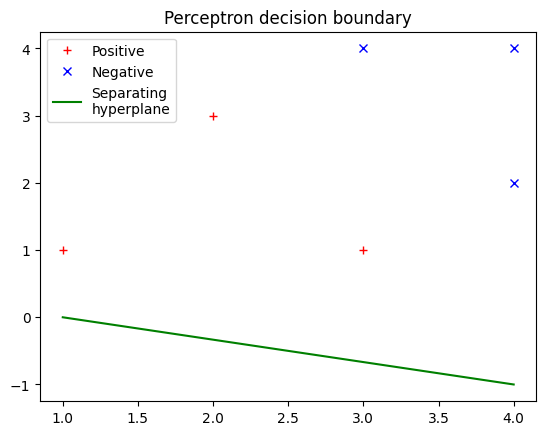

In [73]:
perc_plot(perc, X, y)               # plot the samples and the separating
                                    # hyperplane of the perceptron

The above command should produce the following plot.

<img src="Plot1.png" width="500"/>

Next, we train the perceptron and plot its separating hyperplane after learning.

In [74]:
print("The error rate before training:", 1 - perc.score(X, y))

it = perc.fit(X, y, 0.5, 100) 

print("The error rate after training:", 1 - perc.score(X, y))
print("Used epochs:",it)

The error rate before training: 0.5
The error rate after training: 0.0
Used epochs: 49


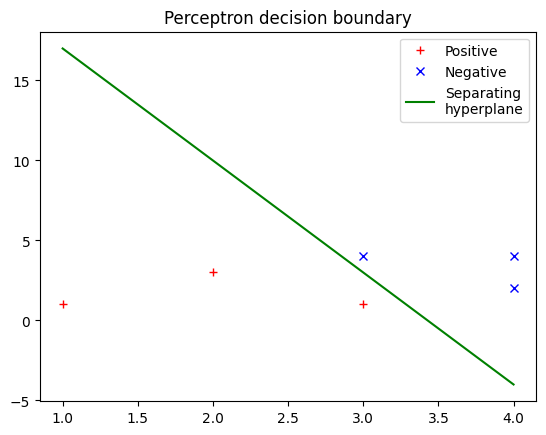

In [75]:
perc_plot(perc, X, y)

The above command should produce the following plot.

<img src="Plot2.png" width="500"/>

**Question:** What is the minimal number of epochs necessary to learn the perceptron to classify all training samples correctly?

Design a small input (linearly separable training set and a vector of desired outputs) and initial 
weights such that the perceptron learning algorithm needs more than 1000 epochs to converge. Use the learning rate `1.0`!

In [141]:
#verify data is linearly separable
def is_linearly_separable(X, y):
    from sklearn.svm import LinearSVC
    clf = LinearSVC(dual=False)
    clf.fit(X, y)
    return clf.score(X, y) == 1.0

def design_datasets(min_epochs = 1000, lr = 1.0, data_len = 100):
    import sklearn.datasets
    done = False
    while not done:
        data, target = sklearn.datasets.make_classification(
        n_samples=data_len, n_features=2, n_informative=2, n_redundant=0,
        n_clusters_per_class=1, flip_y=0, class_sep=2)
        if not is_linearly_separable(data, target):
            #print("Data is not linearly separable, generating new data")
            continue
        #print("Data is linearly separable")
        data = data / 50
        init_weights = np.random.rand(data.shape[1] + 1)
        perc = Perceptron(init_weights=init_weights, lr=lr, max_epochs=int(min_epochs*1.3))
        epochs = perc.fit(data, target)
        if epochs >= min_epochs:
            done = True
    return data, target, init_weights
        


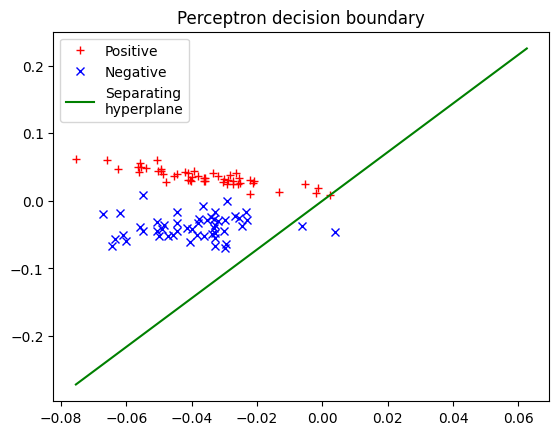

In [142]:
data, target, init_weights = design_datasets()
perc_plot(perc, data, target)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ee9bbc5-8ba7-4beb-8b43-4ea47a301160' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>